#### 🔎 5.1.1 선형회귀(단층 퍼셉트론)

- `unsqueeze()` : 차원을 하나 늘려줄 때

In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.randn(5, 1)

- `nn.Module`을 상속받는 클래스 `LinearRegressor` 만들기
- `__init__`, `super().__init__()` : 초기 세팅에 필요한 내용 입력
- `nn.Linear(N, M, bias=True)`
    - N : 입력 변수의 개수(x의 크기 1)
    - M : 출력 변수의 개수(y의 크기1)
- `forward` : 실제 입력값이 들어와 연산이 진행하는 순서와 방법을 정하는 곳

In [11]:
class LinearRegressor(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.fc = nn.Linear(1, 1, bias=True)
        
    def forward(self, x) :
        y = self.fc(x)
        
        return y

- 클래스가 완성 됐으면 `model` 선언
- 손실함수 : MSE
- 최적화 방법에 모델 파라미터를 넣어 줄 때는 `model.parameters()` 입력

In [14]:
model = LinearRegressor()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
loss_stack = []
for epoch in range(1001) :
    optimizer.zero_grad()
    y_hat = model(x)
    loss = criterion(y_hat, y)
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())
    if epoch % 100 == 0 :
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:31.468257904052734
Epoch 100:4.089526176452637
Epoch 200:2.129930019378662
Epoch 300:1.8939749002456665
Epoch 400:1.7857205867767334
Epoch 500:1.6964565515518188
Epoch 600:1.6176973581314087
Epoch 700:1.547833800315857
Epoch 800:1.4858360290527344
Epoch 900:1.430816888809204
Epoch 1000:1.381990671157837


In [16]:
with torch.no_grad() :
    y_hat = model(x)

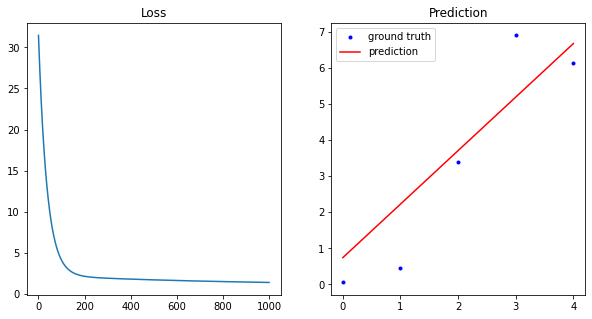

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")
plt.show()

---------------------------------------------------------------------------------------------------

#### 🔎 5.1.2 집값 예측하기

In [18]:
import pandas as pd
import numpy as np

##### 💡 데이터 세트 만들기

In [ ]:
df = pd.read_csv('C:/nozzi/Pytorch/딥러닝을 위한 파이토치 입문/CH4. 파이토치 기본/data/reg.csv', index_col=[0])

##### 💡 데이터 프레임을 넘파이 배열로 만들기

##### 💡 텐서 데이터 만들기

##### 💡 모델 구축하기

##### 💡 모델 학습하기

##### 💡 손실 함수값 그리기

##### 💡 모델 평가하기